## Loading Libraries and Data

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Load datasets
suppliers = pd.read_excel("Data/MedicalEquipmentSuppliers.xls")
states = pd.read_csv("Data/states.csv")

In [2]:
suppliers.head()

,provider_id,acceptsassignement,participationbegindate,businessname,practicename,practiceaddress1,practiceaddress2,practicecity,practicestate,practicezip9code,telephonenumber,specialitieslist,providertypelist,supplieslist,latitude,longitude,is_contracted_for_cba
0,20615807,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,SMITHS PHARMACY #354,3850 E FLAMINGO RD,NaN,LAS VEGAS,NV,891216227,7024515536,Pharmacy|Grocery Store,NaN,Immunosuppressive Drugs|Nebulizer Drugs|Oral A...,36.11640,-115.09056,False
1,20615153,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,SMITHS PHARMACY #47,2039 E 9400 S,NaN,SANDY,UT,840933100,8019422227,Pharmacy|Grocery Store,NaN,Immunosuppressive Drugs|Nebulizer Drugs|Oral A...,40.58055,-111.83280,False
2,20615219,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,FRY'S FOOD AND DRUG STORE #116,950 FAIR ST,NaN,PRESCOTT,AZ,863051806,9287786887,Pharmacy|Grocery Store,NaN,Immunosuppressive Drugs|Nebulizer Drugs|Oral A...,34.55331,-112.48266,False
3,20616047,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,FRY'S FOOD AND DRUG #48,1385 E FLORENCE BLVD,NaN,CASA GRANDE,AZ,851225318,5208360901,Pharmacy|Grocery Store,NaN,Immunosuppressive Drugs|Nebulizer Drugs|Oral A...,32.87947,-111.72816,False
4,20615921,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,FRYS FOOD AND DRUG #112,1575 N DYSART RD,NaN,AVONDALE,AZ,853231204,6239250851,Pharmacy|Grocery Store,NaN,Immunosuppressive Drugs|Nebulizer Drugs|Oral A...,33.46307,-112.33925,False


In [3]:
states.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


## IDA

### Missing Data

In [ ]:
suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   provider_id             58857 non-null  int64         
 1   acceptsassignement      58857 non-null  bool          
 2   participationbegindate  58857 non-null  datetime64[ns]
 3   businessname            58857 non-null  object        
 4   practicename            58857 non-null  object        
 5   practiceaddress1        58857 non-null  object        
 6   practiceaddress2        13130 non-null  object        
 7   practicecity            58857 non-null  object        
 8   practicestate           58857 non-null  object        
 9   practicezip9code        58857 non-null  int64         
 10  telephonenumber         58857 non-null  int64         
 11  specialitieslist        58090 non-null  object        
 12  providertypelist        6835 non-null   object

In [21]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

In [34]:
states[["State", "State Medicaid Expansion (2016)", "Medicaid Enrollment (2013)", "Medicaid Enrollment Change (2013-2016)"]].loc[[6, 19, 51],]

,State,State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment Change (2013-2016)
6,Connecticut,True,NaN,NaN
19,Maine,False,NaN,NaN
51,United States,NaN,56392477.0,16106157.0


/var/folders/h1/55_5cltj235ckl570nxnxbzh0000gn/T/ipykernel_15288/1224270157.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


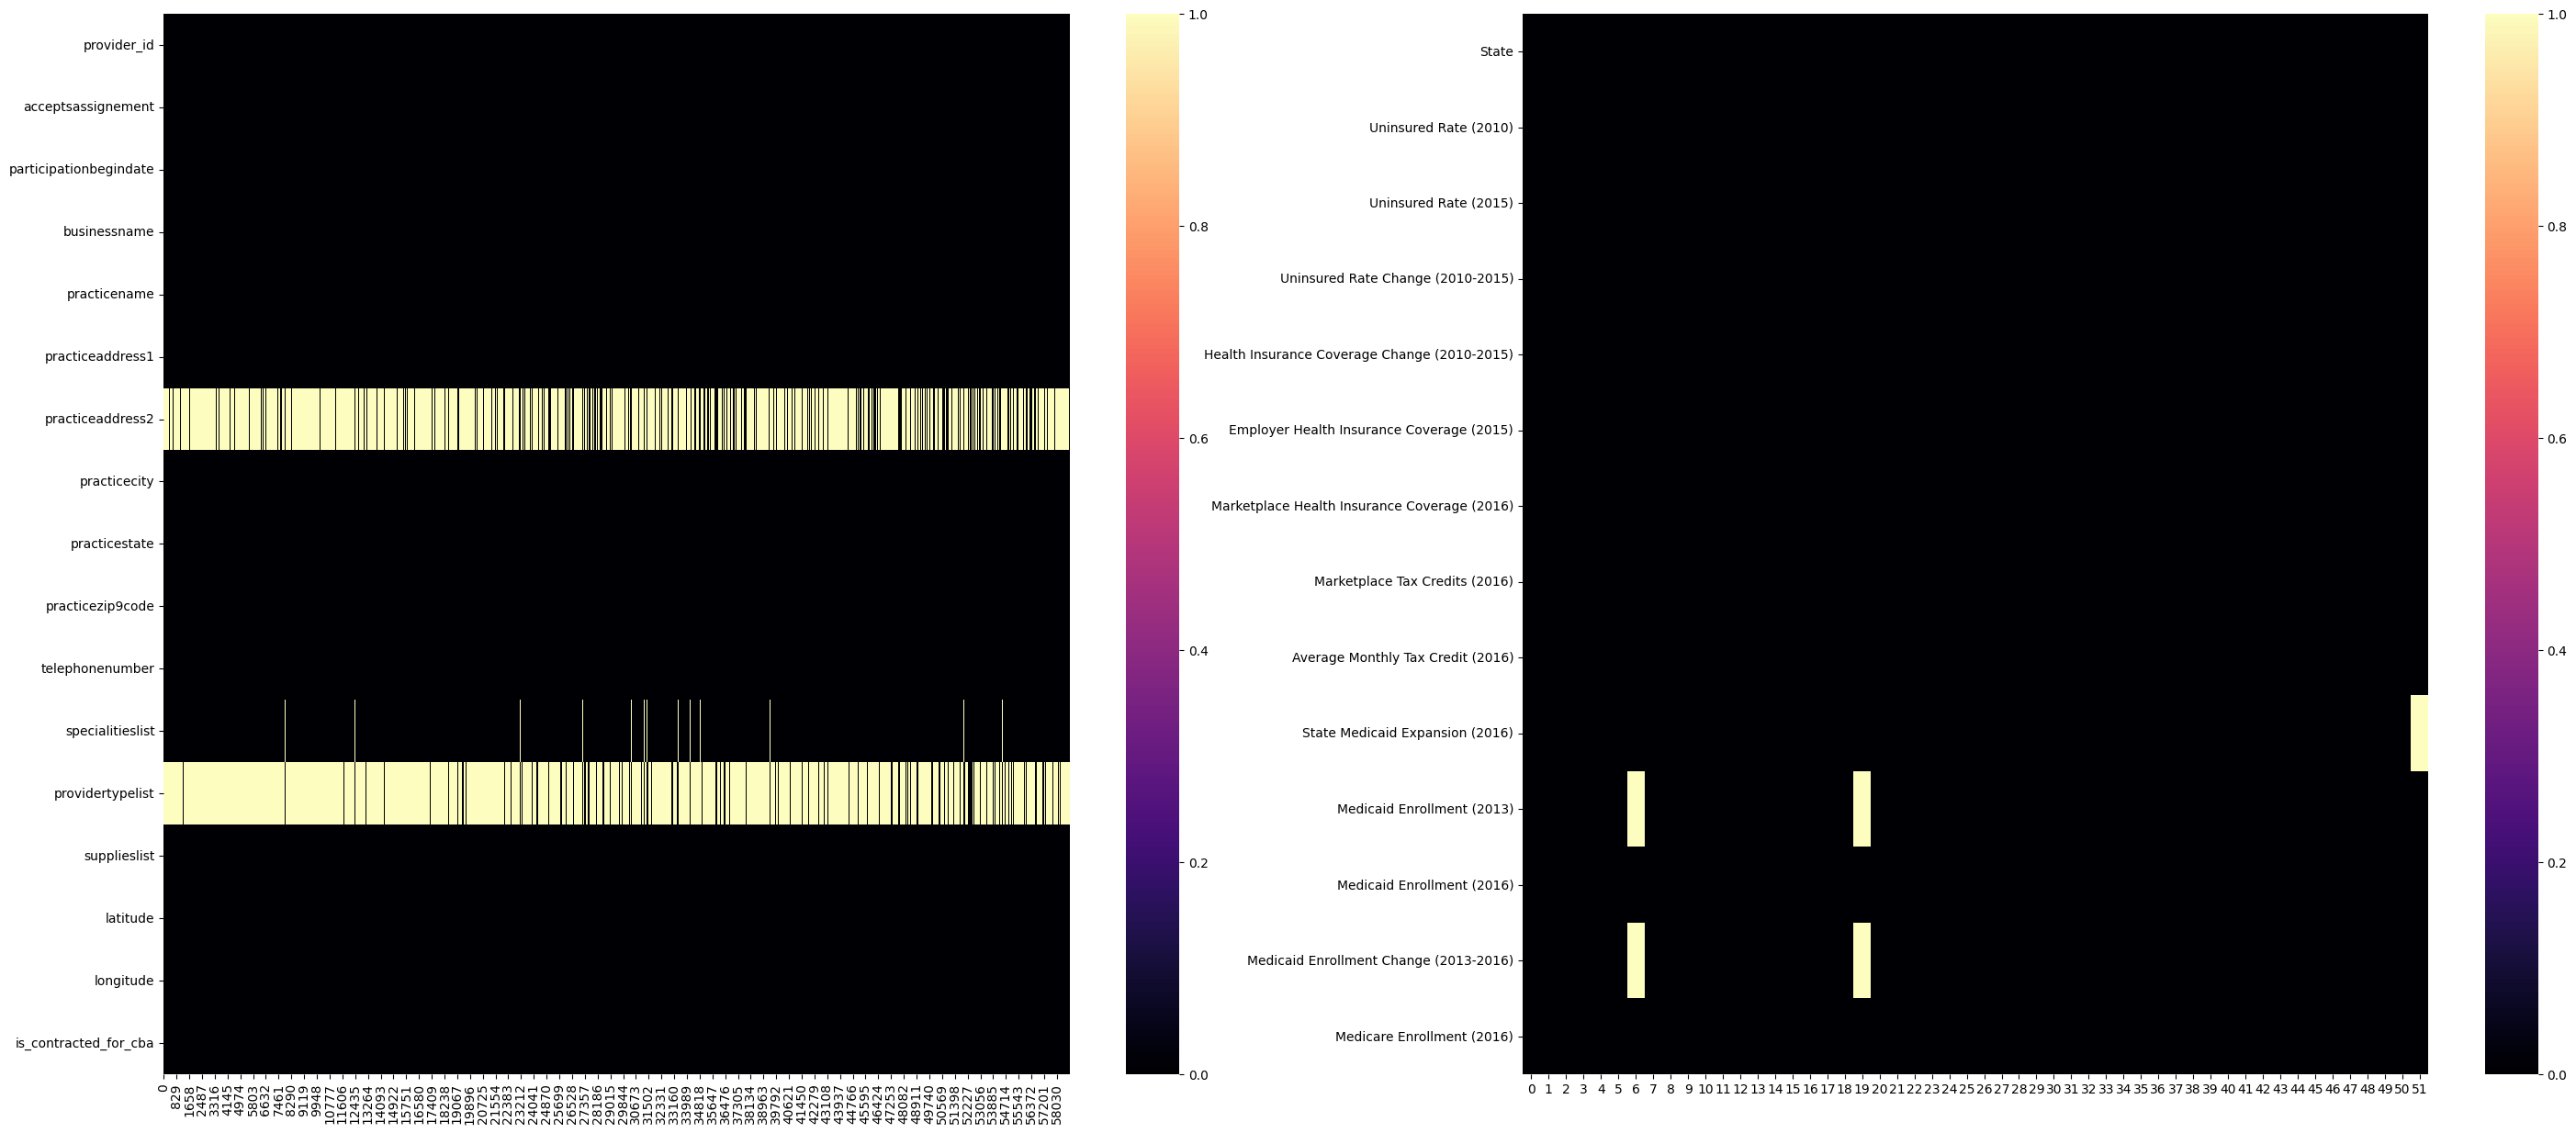

In [5]:
# Create heatmaps to show missing data in each dataset
fig, axes = plt.subplots(1, 2, figsize = (35, 15))
sns.heatmap(suppliers.isna().transpose(), cmap = "magma", ax = axes[0])
sns.heatmap(states.isna().transpose(), cmap = "magma", ax = axes[1])
fig.show()

In [33]:
clean_suppliers = suppliers.copy(deep = True)
clean_suppliers = clean_suppliers.dropna(subset = ["specialitieslist", "supplieslist"]).reset_index(drop = True)

missing_cols = ["specialitieslist", "supplieslist"]
clean_suppliers[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58065 entries, 0 to 58064
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   specialitieslist  58065 non-null  object
 1   supplieslist      58065 non-null  object
dtypes: object(2)
memory usage: 907.4+ KB


In [35]:
clean_states = suppliers.copy(deep = True)


### Duplicate Entries

### Data Structuring

In [ ]:
split_suppliers = suppliers.copy(deep = True)
split_suppliers = split_suppliers.dropna(subset = ["specialitieslist", "supplieslist"]).reset_index(drop = True)
split_suppliers["specialitieslist"] = split_suppliers["specialitieslist"].str.split("|")
split_suppliers["supplieslist"] = split_suppliers["supplieslist"].str.split("|")

In [ ]:
specialities = set()
for row in split_suppliers.itertuples():
    row_specialities = row.specialitieslist
    for supply in row_specialities:
        specialities.add(supply)

In [ ]:
supplies = set()
for row in split_suppliers.itertuples():
    row_supplies = row.supplieslist
    for supply in row_supplies:
        supplies.add(supply)

In [ ]:
# This code block was generated with assistance from ChatGPT (Version 5), accessed on 10/13/2025
mlb = MultiLabelBinarizer()
encoded_specialities = pd.DataFrame(
    mlb.fit_transform(split_suppliers["specialitieslist"]),
    columns = mlb.classes_,
    index = split_suppliers.index
)
encoded_supplies = pd.DataFrame(
    mlb.fit_transform(split_suppliers["supplieslist"]),
    columns = mlb.classes_,
    index = split_suppliers.index
)

suppliers_encoded = pd.concat([split_suppliers, encoded_specialities, encoded_supplies], axis = 1)
suppliers_encoded

,provider_id,acceptsassignement,participationbegindate,businessname,practicename,practiceaddress1,practiceaddress2,practicecity,practicestate,practicezip9code,...,Walkers,Wheelchair Seating/Cushions,Wheelchairs (Complex Rehab Manual Rel Accessories),Wheelchairs (Complex Rehab Power Rel Accessories),Wheelchairs (Complex Rehabilitative Manual),Wheelchairs (Complex Rehabilitative Power),Wheelchairs (Standard Manual Related Accessories),Wheelchairs (Standard Manual),Wheelchairs (Standard Power Related Accessories),Wheelchairs (Standard Power)
0,20615807,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,SMITHS PHARMACY #354,3850 E FLAMINGO RD,NaN,LAS VEGAS,NV,891216227,...,1,0,0,0,0,0,0,0,0,0
1,20615153,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,SMITHS PHARMACY #47,2039 E 9400 S,NaN,SANDY,UT,840933100,...,1,0,0,0,0,0,0,0,0,0
2,20615219,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,FRY'S FOOD AND DRUG STORE #116,950 FAIR ST,NaN,PRESCOTT,AZ,863051806,...,1,0,0,0,0,0,0,0,0,0
3,20616047,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,FRY'S FOOD AND DRUG #48,1385 E FLORENCE BLVD,NaN,CASA GRANDE,AZ,851225318,...,1,0,0,0,0,0,0,0,0,0
4,20615921,True,2025-07-07,SMITHS FOOD & DRUG CENTERS INC,FRYS FOOD AND DRUG #112,1575 N DYSART RD,NaN,AVONDALE,AZ,853231204,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58060,20679017,True,1984-10-01,UNIVERSITY OF TEXAS HEALTH SCIENCE CENTER AT S...,UTHSCSA REHAB ENGINEERING LAB,7703 FLOYD CURL DR,6TH FLOOR ROOM 638E,SAN ANTONIO,TX,78229,...,0,0,0,0,0,0,0,0,0,0
58061,20678369,True,1984-10-01,ALLINA HEALTH SYSTEM,ALLINA HEALTH CAMBRIDGE CLINIC,701 DELLWOOD ST S,NaN,CAMBRIDGE,MN,550081920,...,1,0,0,0,0,0,0,0,0,0
58062,20678603,True,1984-10-01,ALLINA HEALTH SYSTEM,ALLINA HEALTH HASTINGS CLINIC,1880 N FRONTAGE RD,NaN,HASTINGS,MN,550332687,...,0,0,0,0,0,0,0,0,0,0
58063,20677991,True,1984-10-01,ALLINA HEALTH SYSTEM,ALLINA HEALTH SYSTEM,14655 GALAXIE AVE,NaN,APPLE VALLEY,MN,551248575,...,0,0,0,0,0,0,0,0,0,0


## Map

In [ ]:
selected = ["Pharmacy", "Walkers"]
selected_suppliers = suppliers_encoded[selected]
selected_suppliers.all(axis=1)

0         True
1         True
2         True
3         True
4         True
         ...  
58060    False
58061    False
58062    False
58063    False
58064    False
Length: 58065, dtype: bool